In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 30)
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv(r"D:\CampMain\DSMP 1.0\2) Python\3) Data analysis Process\Data Analysis Projects\02 Smartphone\smartphones.csv")

df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [3]:
data = df.copy()

In [4]:
data.shape

(1020, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [6]:
# to prevent consistency issue Oppo, oppo, OppO
data['model'] = data['model'].str.lower()

In [7]:
data['price'] = data['price'].str.replace("₹",'').str.replace(',','').astype(int)

In [8]:
# data['rating'] = data['rating'].fillna(0).astype(int)

In [9]:
data[data['sim'].str.contains('Sim', case = False) == False]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
754,apple ipod touch (7th gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser


- We are working on smartphone not on ipod so drop it

In [10]:
data.drop(index = 754, inplace = True)
data.reset_index(drop = True, inplace = True)

In [11]:
processor_ram_problem_index = data['processor'][data['processor'].str.contains('RAM', case = False)].index.to_list()
x = data.iloc[processor_ram_problem_index, 4:].shift(1, axis=1).values
data.iloc[processor_ram_problem_index, 4:] = x

- 924, 929, 987 os column have os name Browser, Browser, Browser

In [12]:
data.iloc[[924, 929, 987], -1] = 'Browser'

In [13]:
data['processor'] = data['processor'].fillna('Gap')

In [14]:
processor_battery_problem_index = data['processor'][data['processor'].str.contains('Battery', case = False)].index.to_list()

data.iloc[processor_battery_problem_index, 4:]

,processor,ram,battery,display,camera,card,os
645,1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
699,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN,NaN,NaN
748,2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN


- 748 OS column have os name Browser

In [15]:
x =  data.iloc[processor_battery_problem_index, 4:].shift(2, axis=1).values

data.iloc[processor_battery_problem_index, 4:] = x

data.iloc[processor_battery_problem_index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,nokia 2760 flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",None,None,1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0
699,samsung guru gt-e1215,1850,NaN,Single Sim,None,None,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,No FM Radio,NaN
748,nokia 400 4g,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",None,None,2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth


In [16]:
data['processor'] = data['processor'].fillna('Gap')

In [17]:
data['ram'] = data['ram'].fillna('Gap')

## Ram

In [18]:
data['ram'][~data['ram'].str.contains('inbuilt')]

376                       Unisoc T107
532    Single Core, 208 MHz Processor
551                              T117
582                       Unisoc T107
611      Dual Core, 500 MHz Processor
645                               Gap
699                               Gap
748                               Gap
816                              T117
881                       Unisoc T107
926                   800 mAh Battery
999                           No Wifi
Name: ram, dtype: object

- No Wifi
- Processor
- Battery
- T117
- Unisoc T107

In [19]:
ram_ram_problem_index = data['ram'][data['ram'].str.contains('Processor', case = False)].index.to_list()
ram_ram_problem_index

[532, 611]

In [20]:
data.iloc[ram_ram_problem_index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
532,samsung guru music 2 dual sim,1949,NaN,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
611,eunity u1 5605n,699,NaN,Dual Sim,No 3G,"Dual Core, 500 MHz Processor","32 MB RAM, 32 MB inbuilt",3000 mAh Battery,"1.8 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB"


In [21]:
x = data.iloc[ram_ram_problem_index, 5].values
data.iloc[ram_ram_problem_index, 4] = x

In [22]:
data.iloc[532, 5] = 'Gap'
data.iloc[611, 5] = '32 MB RAM, 32 MB inbuilt'
data.iloc[611, 6] = '3000 mAh Battery'
data.iloc[611, 7] = '1.8 inches, 128 x 160 px Display'
data.iloc[611, 8] = '0.3 MP Rear Camera'
data.iloc[611, 9] = 'Memory Card Supported, upto 16 GB'
data.iloc[611, 10] = 'Gap'

data.iloc[ram_ram_problem_index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
532,samsung guru music 2 dual sim,1949,NaN,Dual Sim,"Single Core, 208 MHz Processor",Gap,800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
611,eunity u1 5605n,699,NaN,Dual Sim,"Dual Core, 500 MHz Processor","32 MB RAM, 32 MB inbuilt",3000 mAh Battery,"1.8 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB",Gap


In [23]:
ram_ram_problem_index = data['ram'][data['ram'].str.contains('Battery', case = False)].index.to_list()
x = data.iloc[ram_ram_problem_index, 5:].shift(1, axis = 1).values

data.iloc[ram_ram_problem_index, 5:] = x

In [24]:
Index = data['ram'][data['ram'].isnull()].index.to_list()
data.loc[Index, 'ram'] = 'Gap'

In [25]:
data[data['ram'].str.contains('T117', case = False)]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
551,itel magic 2 4g,2399,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
816,itel magic x,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"


In [26]:
ram_ram_problem_index = data['ram'][data['ram'].str.contains('T117', case = False)].index.to_list()
x = data.iloc[ram_ram_problem_index, :3:-1].shift(1, axis = 1).values

data.iloc[ram_ram_problem_index, :3:-1] = x

In [27]:
data['os'] = data['os'].fillna ('Gap') 

In [28]:
Index = data[data['ram'].str.contains('Unisoc T107', case = False)].index
x = data.iloc[Index, :3:-1].shift(1, axis = 1).values

data.iloc[Index, :3:-1] = x

In [29]:
data.iloc[376, 8] = "0.3 MP Rear Camera"
data.iloc[376, 9] = "Gap"

data['os'] = data['os'].fillna ('Gap')

In [30]:
ram_ram_problem_index = data['ram'][data['ram'].str.contains('wifi', case = False)].index.to_list()

x = data.iloc[ram_ram_problem_index, :4:-1].shift(1, axis = 1).values

data.iloc[ram_ram_problem_index, :4:-1] = x

In [31]:
data.iloc[999, 4] = "Gap"
data.iloc[999, 8] = "1.3 MP Rear Camera"
data.iloc[999, 9] = "Gap"

data['os'] = data['os'].fillna ('Gap')

## battery

- inches

In [32]:
battery_problem_index = data['battery'][~data['battery'].str.contains('Battery', case = False)].index.to_list()

x= data.iloc[battery_problem_index, 6:].shift(1, axis = 1).values

data.iloc[battery_problem_index, 6:] = x

In [33]:
data['battery'] = data['battery'].fillna ('Gap')

## display

In [34]:
Index = data['display'][~data['display'].str.contains('inches', case = False)].index
x = data.iloc[Index, 7:].shift(1, axis = 1).values

data.iloc[Index, 7:] = x

In [35]:
data.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

## camera

- Display
- Memory Card Supported, upto 32 GB

In [36]:
data['camera'][~data['camera'].str.contains('Camera', case = False)]

69         Foldable Display, Dual Display
98                       Foldable Display
155                          Dual Display
159        Foldable Display, Dual Display
236        Foldable Display, Dual Display
271                          Dual Display
306        Foldable Display, Dual Display
321        Foldable Display, Dual Display
322        Foldable Display, Dual Display
365        Foldable Display, Dual Display
392        Foldable Display, Dual Display
482        Foldable Display, Dual Display
504        Foldable Display, Dual Display
569        Foldable Display, Dual Display
570                          Dual Display
613                          Dual Display
682                          Dual Display
703        Foldable Display, Dual Display
709                          Dual Display
721                          Dual Display
726                      Foldable Display
789        Foldable Display, Dual Display
843                          Dual Display
880     Memory Card Supported, upt

In [37]:
camera_problem_index = data['camera'][data['camera'].str.contains('Memory Card', case = False)].index.to_list()
data.iloc[camera_problem_index, 9] = 'Memory Card Supported, upto 32 GB'
data.iloc[camera_problem_index, 8] = 'Gap'

data.iloc[camera_problem_index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
880,nokia 110 (2022),1599,NaN,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display",Gap,"Memory Card Supported, upto 32 GB",Gap


In [38]:
camera_problem_index = data['camera'][data['camera'].str.contains('Display', case = False)].index.to_list()

x= data.iloc[camera_problem_index, 9:7:-1].shift(1, axis = 1).values

data.iloc[camera_problem_index, 9:7:-1] = x

## Card

In [39]:
data.iloc[camera_problem_index, 9] = 'Gap'

In [40]:
temp = data.iloc[camera_problem_index, 10]
Index = temp[temp.str.contains('Card')].index.to_list()

x = data.iloc[Index, 10:8:-1].shift(1, axis = 1).values

data.iloc[Index, 10:8:-1] = x
data.iloc[Index, 10] = 'Gap'

data.iloc[camera_problem_index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
69,oppo find n fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Gap,Android v12
98,vivo x fold 5g,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,Gap,Android v12
155,nokia 2780 flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",5 MP Rear Camera,"Memory Card Supported, upto 32 GB",Gap
159,oppo find n2 5g,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Gap
236,xiaomi mix fold 2 5g,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Gap,Android v12
271,nokia 2720 v flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Gap
306,samsung galaxy z flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Gap
321,samsung galaxy z fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Gap,Android v12
322,royole flexpai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB",Gap
365,oppo find n flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported,Gap


In [41]:
Index= data[data['processor'].str.contains('wifi', case = False)].index.to_list()

data.iloc[Index, 4] = 'Gap'

data.iloc[Index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
473,nokia 110 4g,1762,NaN,"Dual Sim, 3G, 4G, VoLTE",Gap,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Gap
573,nokia 105 (2019),1299,NaN,Single Sim,Gap,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,Gap
880,nokia 110 (2022),1599,NaN,Dual Sim,Gap,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.77 inches, 120 x 160 px Display",Gap,"Memory Card Supported, upto 32 GB",Gap
916,nokia 150 (2020),2499,NaN,Dual Sim,Gap,4 MB inbuilt,1020 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth
926,samsung guru e1200,1685,NaN,Single Sim,Gap,Gap,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,No FM Radio,Gap


In [42]:
data = data.fillna('Gap', inplace = True)

C:\Users\babul\AppData\Local\Temp\ipykernel_7460\1712936186.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Gap' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('Gap', inplace = True)


In [43]:
Index = data['card'][data['card'].str.contains('No FM Radio', case = False)].index.to_list()

data.iloc[Index, 9] = 'Gap'

data.iloc[Index, :]

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
657,zanco tiny t1,2799,Gap,Single Sim,Gap,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,Gap,Bluetooth
699,samsung guru gt-e1215,1850,Gap,Single Sim,Gap,Gap,800 mAh Battery,"1.5 inches, 120 x 120 px Display",No Rear Camera,Gap,Gap
926,samsung guru e1200,1685,Gap,Single Sim,Gap,Gap,800 mAh Battery,"1.5 inches, 128 x 128 px Display",No Rear Camera,Gap,Gap


In [44]:
Index = data['card'][~data['card'].str.contains('Card', case = False)].index.to_list()

x = data.iloc[Index, 9:].shift(1, axis = 1).values

data.iloc[Index, 9:] = x

data.iloc[Index, :].head(6)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
8,nothing phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,None,Android v12
9,oneplus nord 2t 5g,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v12
12,xiaomi redmi note 12 pro 5g,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
17,oppo reno 9 pro plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v13
18,oneplus 10r 5g,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
20,oneplus 11r,39999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 12 MP + 2 MP Triple Rear & 16 MP Front...,None,Android v13


In [45]:
data.iloc[Index, 9] = 'Gap'

## OS

- Bluetooth
- Browser

In [46]:
Index = data['os'][data['os'].str.contains('Bluetooth', case = False)].index.to_list()

data.iloc[Index, 10] = 'Gap'

In [47]:
Index = data['os'][data['os'].str.contains('Browser', case = False)].index.to_list()

data.iloc[Index, 10] = 'Gap'

In [48]:
# extract only smartphones
x = data[data['ram'].str.contains('MB RAM', case = False)].index.to_list()
# drop these phones
data.drop(index = x, inplace = True)
# reset the index
data.reset_index(drop = True, inplace = True)

In [49]:
# check
# These phones are not smartphones so we can drop them
data = data[~data['price']<= 3000]
data.reset_index(drop = True, inplace = True)
data.shape

(990, 11)

# Tidiness

## Sim

In [50]:
data.isin(['Gap']).any(axis = 1).sum()

312

In [51]:
brand_names = data['model'].str.split(' ').str.get(0)
data.insert(0,'brand_name',brand_names)

In [52]:
# data['sim'].str.extract(r'(\w+\s\w+)', expand = True)

In [53]:
# create a column where sim type are present mean Dual or single sim
sim_type = np.where(data['sim'].str.contains('Dual', case = False), 'Dual', 'Single')

# create a column when the sim is 5G enable or not
fiveG_enable = np.where(data['sim'].str.contains('5G', case = False), True, False)

# create a column when the sim is NFC present or not
NFC_enable = np.where(data['sim'].str.contains('NFC', case = False), True, False)

# create a column when the sim has IR Blaster or not
IR_blaster = np.where(data['sim'].str.contains('IR Blaster', case = False), True, False)

data.insert(4, 'sim_type', sim_type)
data.insert(5, '5G_enable', fiveG_enable)
data.insert(6, 'NFC_enable', NFC_enable)
data.insert(7, 'IR_blaster', IR_blaster)

data.drop(columns = 'sim', inplace = True)

- `Namotel Achhe Din` was initially advertised as the "world's cheapest smartphone" by Namotel, an Indian company. It was marketed with a price tag of 99 Indian Rupees (approximately $1.50 USD), which gained significant attention and skepticism due to its incredibly low price point. However, there were doubts about its availability and authenticity, with many questioning whether such a device could be produced and sold at such a low cost.` Eventually, it was revealed that Namotel Achhe Din was likely a promotional stunt rather than an actual product. `Despite the claims, there hasn't been any substantial evidence or widespread availability of the device, leading many to conclude that it may not have been a real smartphone.

- The `Nokia 2760 Flip` is a feature phone, not a smartphone.
- The `Samsung Guru GT-E1215` is a feature phone, not a smartphone.
- The `Nokia 400 4G` is a feature phone. 
- The `LG Folder 2` is a feature phone, not a smartphone.
- The `Nokia 150 (2020)` is a feature phone, not a smartphone.
- The `Samsung Guru E1200` is a feature phone.

In [54]:
Index = data['processor'][data['processor'].str.contains('Gap', case = False)].index.to_list()

data.drop(index = Index, inplace = True)
data.reset_index(drop = True, inplace = True)

In [55]:
data[data['ram'].str.contains('Gap', case = False)]

,brand_name,model,price,rating,sim_type,5G_enable,NFC_enable,IR_blaster,processor,ram,battery,display,camera,card,os
527,samsung,samsung guru music 2 dual sim,1949,Gap,Dual,False,False,False,"Single Core, 208 MHz Processor",Gap,800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Gap


- `Samsung Guru Music 2 Dual Sim` is a feature phone, not a smartphone.

In [56]:
Index = data[data['ram'].str.contains('Gap', case = False)].index.to_list()

data.drop(index = Index, inplace = True)
data.reset_index(drop = True, inplace = True)

In [57]:
# change the Gap in card to Memory Card Not Supported
data['card'] = np.where(data['card'].str.contains('Gap', case = False), 'Memory Card Not Supported', data['card'])

In [58]:
# change the Gap in os to Not Specified

data['os'] = np.where(data['os'].str.contains('Gap', case = False), 'Not Specified', data['os'])

In [59]:
processor_name = data['processor'].str.split(',').str.get(0).str.strip()

x = data['processor'].str.split(',').str.get(1).str.strip()
num_cores = np.where(x.str.contains('Core', case = False), x, 'Gap')

y = data['processor'].str.split(',').str.get(-1).str.strip()

processor_speed = np.where(y.str.contains('GHz', case = False), y, 'Gap')

data.insert(9, 'processor_name', processor_name)
data.insert(10, 'processor_core', num_cores)
data.insert(11, 'processor_speed', processor_speed)

In [60]:
Index = data[data['processor_name'].str.contains('Core')].index.to_list()

x = data.loc[Index, 'processor_name'].values

data.iloc[Index, 10] = x
data.iloc[Index, 9] = 'Gap'

In [61]:
data[data['processor_name'].str.contains('nm')]

,brand_name,model,price,rating,sim_type,5G_enable,NFC_enable,IR_blaster,processor,processor_name,processor_core,processor_speed,ram,battery,display,camera,card,os
829,samsung,samsung galaxy a01 core,4999,Gap,Dual,False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [62]:
data.loc[829, 'processor_name'] = 'Mediatek MT6739'

In [63]:
fill_value = ['Gap', 'MediaTek', 'Mediatek','Exynos 850', 'Exynos 850','Unisoc SC7731E', 'MediaTek Helio G99', 'Exynos 1330 5nm', 'Exynos', 'Mediatek', 'MediaTek Helio A22 MT6761', 'UniSoC Spreadtrum SC7731E', 'Exynos 2200', 'Snapdragon 730G','Kirin 710', 'Exynos 1380', 'MediaTek Helio G85', 'Snapdragon 450 (14 nm)', 'Mediatek', 'Snapdragon 778G']

Index = data[data['processor_name'].str.contains('Gap')].index.to_list()
data.loc[Index, 'processor_name'] = fill_value


- `Smartphones (with processor information):`
    - Tesla Pi Phone: Processor name not specified

    - Jio Phone 3: MediaTek

    - Ikall Z19 Pro: Mediatek

    - Samsung Galaxy A13:  Exynos 850

    - **Samsung Galaxy A13 (4Gb Ram + 128Gb): Exynos 850**

    - Itel S16 Pro : Unisoc SC7731E

    - Samsung Galaxy A15: MediaTek Helio G99

    - Samsung Galaxy F14: Samsung Exynos 1330 5nm

    - Samsung Galaxy A13 (6Gb Ram + 128Gb): Exynos

    - Ikall Z19: Mediatek

    - Tecno Spark Go 2022: MediaTek Helio A22 MT6761

    - Itel A56 : UniSoC Spreadtrum SC7731E

    - Samsung Galaxy S23 Fe 5G: Samsung Exynos 2200

    - Samsung Galaxy M51S 5G: Qualcomm Snapdragon 730G

    - Huawei Nova Y61: Kirin 710

    - Samsung Galaxy M35: Samsung Exynos 1380

    - Samsung Galaxy A05: MediaTek Helio G85

    - Samsung Galaxy A11: Qualcomm SDM450 Snapdragon 450 (14 nm)

    - Ikall Z18: Mediatek

    - **Samsung Galaxy M52S 5G: Qualcomm Snapdragon 778G**
        - Samsung Galaxy M52 5G name problem**
    

    **“Tesla Pi Phone” is that it will not go out of range anywhere in the world because it is connected by internet from space , Provided by SpaceX's Starlink service, another Elon Musk company**
    

In [64]:
data.drop(index=[118,201], inplace = True) #drop tesla Pi
data.reset_index(drop = True, inplace = True)

In [65]:
Index = data[data['model']=='Samsung Galaxy M52S 5G'].index.to_list()
data.loc[Index, 'model'] = 'Samsung Galaxy M52 5G'

In [66]:
data['processor_name'] = data['processor_name'].str.replace('Samsung ', '').str.strip()

In [67]:
data.fillna('Gap', inplace = True)

- Apple Iphone 15 Pro Max:  octa core 2.84 GHz

- Apple Iphone Xr2: hexa core 2.49 GHz

- Apple Iphone 14 Mini: hexa core 3.23 GHz

- Nokia X50 5G: octa core 2.4 GHz

- Apple Iphone 15 Pro: hexa core 3.78

- Apple Iphone 15: hexa core 3.46 GHz

In [68]:
x = ['Octa Core', 'Hexa Core', 'Hexa Core', 'Octa Core', 'Hexa Core', 'Hexa Core']
y = ['2.84 GHz', '2.49 GHz', '3.23 GHz', '2.4 GHz', '3.78 GHz', '3.46 GHz']

Index = data[data['processor_core'].str.contains('Gap')].index.to_list()
data.loc[Index, 'processor_core'] = x
data.loc[Index, 'processor_speed'] = y

In [69]:
x = ['3.46 GHz', '2.6 GHz', '3.46 GHz', '2.80 GHz', '2.85 GHz', '2.4GHz', '3.46 GHz', '2 GHz', '2.2 GHz',
'2.91 GHz', '3.46 GHz', '3.39 GHz', '1.8 GHz', '3.46 GHz', '3.46 GHz', '2.2 GHz', '2.4 GHz', '3.2 GHz',
'2.0 GHz', '3.1 GHz', '2.84 GHz', '3.0 GHz', '3.46 GHz', '2.8 GHz', '2.2 GHz', '3.35 GHz', '2.4 GHz','2.8 GHz', '2.2 GHz', '2.8 GHz', '3.46 GHz', '2.4GHz', '2 GHz', '3.0 GHz', '1.8GHz']

Index = data[data['processor_speed'].str.contains("Gap")].index.to_list()

data.loc[Index, 'processor_speed'] = x

In [70]:
processor_brand = data['processor_name'].str.split(' ').str.get(0).str.strip().str.title()
data.insert(10, 'processor_brand', processor_brand)

In [71]:
Index = data[data['processor_brand']== 'Sanpdragon'].index
data.loc[Index,'processor_brand'] = 'Snapdragon'

In [72]:
data['processor_core'] = data['processor_core'].str.replace(' Processor', '').str.strip()

In [73]:
# extract 3.2 from 3.2 GHz Processor
data['processor_speed'] = data['processor_speed'].str.split('G').str.get(0).str.strip().astype(float)

In [74]:
data.drop(columns = ['processor'], inplace = True)

In [75]:
data1 = data.copy()

In [76]:
def deal_rom(x):
    x = str(x)
    if 'TB' in x:
        n = x.split('TB')[0].strip()
        return str(int(n)*1000)
    elif 'GB' in x:
        n = x.split('GB')[0].strip()
        return str(int(n))
    elif 'MB' in x:
        n = x.split('MB')[0].strip()
        return str(int(n)/1000)
    else:
        return 'Gap'
    
rom = data['ram'].str.split(',').str.get(1).str.strip()
data.insert(13, 'rom', rom)

data['rom'] = data['rom'].apply(lambda x: deal_rom(x))

In [77]:
ro = ['64', '512', '64']
ra = ['4 GB', '12 GB', '6 GB']
Index = data[data['rom'] == 'Gap'].index.to_list()

data.loc[Index, 'rom'] = ro
data.loc[Index, 'ram'] = ra

In [78]:
def deal_ram(x):
    x = str(x)
    if 'GB' in x:
        n = x.split('GB')[0].strip()
        return str(n)
    elif 'MB' in x:
        n = x.split('MB')[0].strip()
        return str(int(n)/1000)
    else:
        return 'Gap'

In [79]:
data['ram'] = data['ram'].str.split(',').str.get(0) 

data['ram'] = data['ram'].apply(lambda x: deal_ram(x))

In [80]:
f = ['2815 mAh', '2227 mAh', '2815 mAh', '2227 mAh', '2018 mAh', '3290 mAh', '2815 mAh', '3279 mAh', '2815 mAh', '2227 mAh', '2815 mAh']

Index = data[data['battery'].str.contains('Gap')].index.to_list()

data.loc[Index, 'battery'] = f

In [81]:
data.columns

Index(['brand_name', 'model', 'price', 'rating', 'sim_type', '5G_enable',
       'NFC_enable', 'IR_blaster', 'processor_name', 'processor_brand',
       'processor_core', 'processor_speed', 'ram', 'rom', 'battery', 'display',
       'camera', 'card', 'os'],
      dtype='object')

In [82]:
battery_capacity = data['battery'].str.split('mAh').str.get(0).str.strip().astype(int)

data.insert(15, 'battery_capacity', battery_capacity)

In [83]:
fast_charge = data['battery'].str.split('mAh').str.get(1).str.strip().str.extract(r'(\d+)').astype(float)

data.insert(16, 'fast_charge', fast_charge)

In [84]:
(data[data['fast_charge'].isnull()].shape[0] / data.shape[0] )*100

21.73469387755102

In [85]:
data['fast_charge'] = np.where(data['fast_charge'].isnull(), 0, data['fast_charge'])
data['fast_charge'] = data['fast_charge'].astype(int)

In [86]:
data.drop(columns = ['battery'], inplace = True)

## Display

In [87]:
data.columns

Index(['brand_name', 'model', 'price', 'rating', 'sim_type', '5G_enable',
       'NFC_enable', 'IR_blaster', 'processor_name', 'processor_brand',
       'processor_core', 'processor_speed', 'ram', 'rom', 'battery_capacity',
       'fast_charge', 'display', 'camera', 'card', 'os'],
      dtype='object')

In [88]:
screen_size = data['display'].str.split(',').str.get(0).str.strip().str.replace(' inches', '').str.strip().astype(float)

data.insert(17, 'screen_size', screen_size)

In [89]:
resolution = data['display'].str.split(',').str.get(1).str.strip().str.split('px').str.get(0).str.strip()

data.insert(18, 'resolution', resolution)

In [90]:
# refresh_rate
refresh_rate = data['display'].str.split(',').str.get(2).str.strip().str.extract(r'(\d+)').squeeze()
refresh_rate = np.where(refresh_rate.isnull(), '60', refresh_rate).astype(int)
data.insert(19, 'refresh_rate', refresh_rate)

data.drop(columns = ['display'], inplace = True)

## Camera

In [91]:
def camera_extractor(text):
  text = str(text)
  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  else:
    return '1'

In [92]:
num_rear_cameras = data['camera'].str.split('&').str.get(0).str.strip().apply(camera_extractor).astype(int)

data.insert(20, 'num_rear_cameras', num_rear_cameras)

In [93]:
num_front_cameras = data['camera'].str.split('&').str.get(1).str.strip().apply(camera_extractor)

data.insert(21, 'num_front_cameras', num_front_cameras)

- 154: Nokia 2780 Flip feature mobile phone
- 457 954	:Xiaomi Mi Mix Alpha and Huawei Mate X	has no front camera
- 972: Itel A23S	has only 1 front camera

In [94]:
data.loc[[457, 954], 'num_front_cameras'] = '0'
data.loc[972, 'num_front_cameras'] = '1'

In [95]:
data.drop(index= 154, inplace = True)

data.reset_index(drop = True, inplace = True)

In [96]:
data['num_front_cameras'] = data['num_front_cameras'].astype(int)

In [97]:
primary_camera_rear = data['camera'].str.split('M').str.get(0).str.strip().astype(float)

data.insert(22, 'primary_camera_rear', primary_camera_rear)

In [98]:
primary_camera_front = data['camera'].str.split('&').str.get(1).str.strip().str.split('M').str.get(0).str.strip()

data.insert(23, 'primary_camera_front', primary_camera_front)
data.loc[[456, 953], 'primary_camera_front'] = '0'
data.loc[971, 'primary_camera_front'] = '0.3'
data.loc[598, 'primary_camera_front'] = '20'

data.drop(columns = ['camera'], inplace = True)

data['primary_camera_front'] = data['primary_camera_front'].astype(float)

In [99]:
extended_memory_available = np.where(data['card'].str.contains('upto', case = False), True, False)

data.insert(24, 'extended_memory_available', extended_memory_available)

In [100]:
def deal_with_card(x):
    x = str(x)
    if 'upto' in x:
        if 'TB' in x:
            n = x.split('upto')[1].strip().split('TB')[0].strip()
            return str(int(n)*1000)
        else:
            n = x.split('upto')[1].strip().split('GB')[0].strip()
            return str(n)
    else:
        return np.nan

extended_memory = data['card'].apply(deal_with_card)

data.insert(25, 'extended_memory', extended_memory)

In [101]:
data['extended_memory'] = data['extended_memory'].astype(float)

In [102]:
data.drop(columns=['card'], inplace = True)

In [103]:
def os_extractor(text):

  if 'Android' in text:
    return 'Android'
  elif 'iOS' in text:
    return 'ios'
  elif 'Not Specified' in text:
    return text
  else:
    return 'Other'

data['os'] = data['os'].apply(os_extractor)

In [104]:
replace = {'Octa Core':'8', 'Hexa Core':'6', 'Quad Core':'4'}

data['processor_core'] = data['processor_core'].replace(replace).astype(int)

In [105]:
fast_charge_available = np.where(data['fast_charge']==0, False, True)
data.insert(15, 'fast_charge_available', fast_charge_available)

In [106]:
data['ram'] = data['ram'].astype(int)
data['rom'] = data['rom'].astype(int)

In [107]:
# check_null value of particular column

def check_missing(df):
    X = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).reset_index().rename(columns={'index':'feature',0:'missing_percentage'})
    return X[X['missing_percentage']>0]

check_missing(data)

,feature,missing_percentage
0,extended_memory,48.212462


- Around 48% missing value in extended_memory column 

In [108]:
dropcol = ['extended_memory', 'model', 'processor_name', 'resolution', 'fast_charge']

data.drop(columns = dropcol, inplace = True)

In [109]:
data.drop_duplicates(inplace = True)

In [110]:
# data[data.isin(['Gap']).any(axis = 1)]

In [111]:
data.replace('Gap', np.nan, inplace=True)

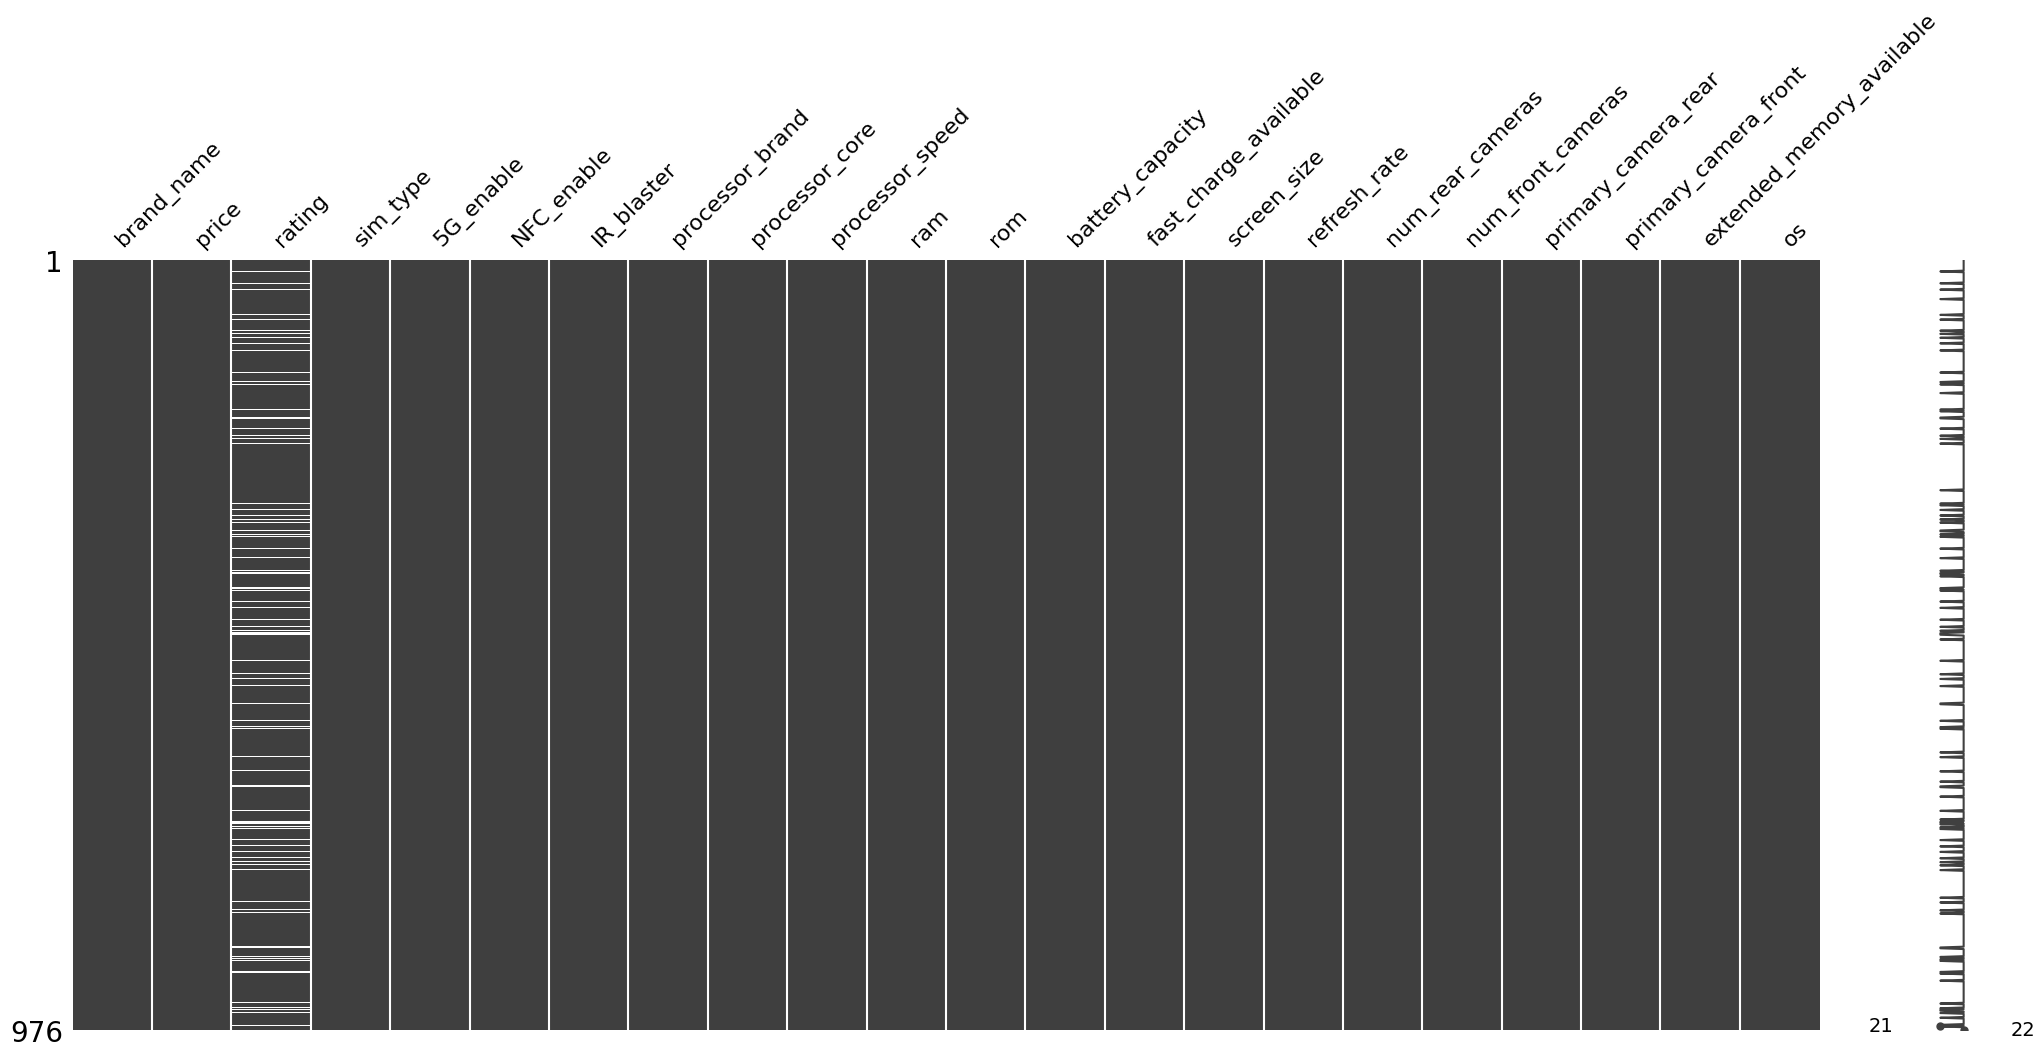

In [112]:
# Matrix chart to visualize missing values
msno.matrix(data)
plt.show()

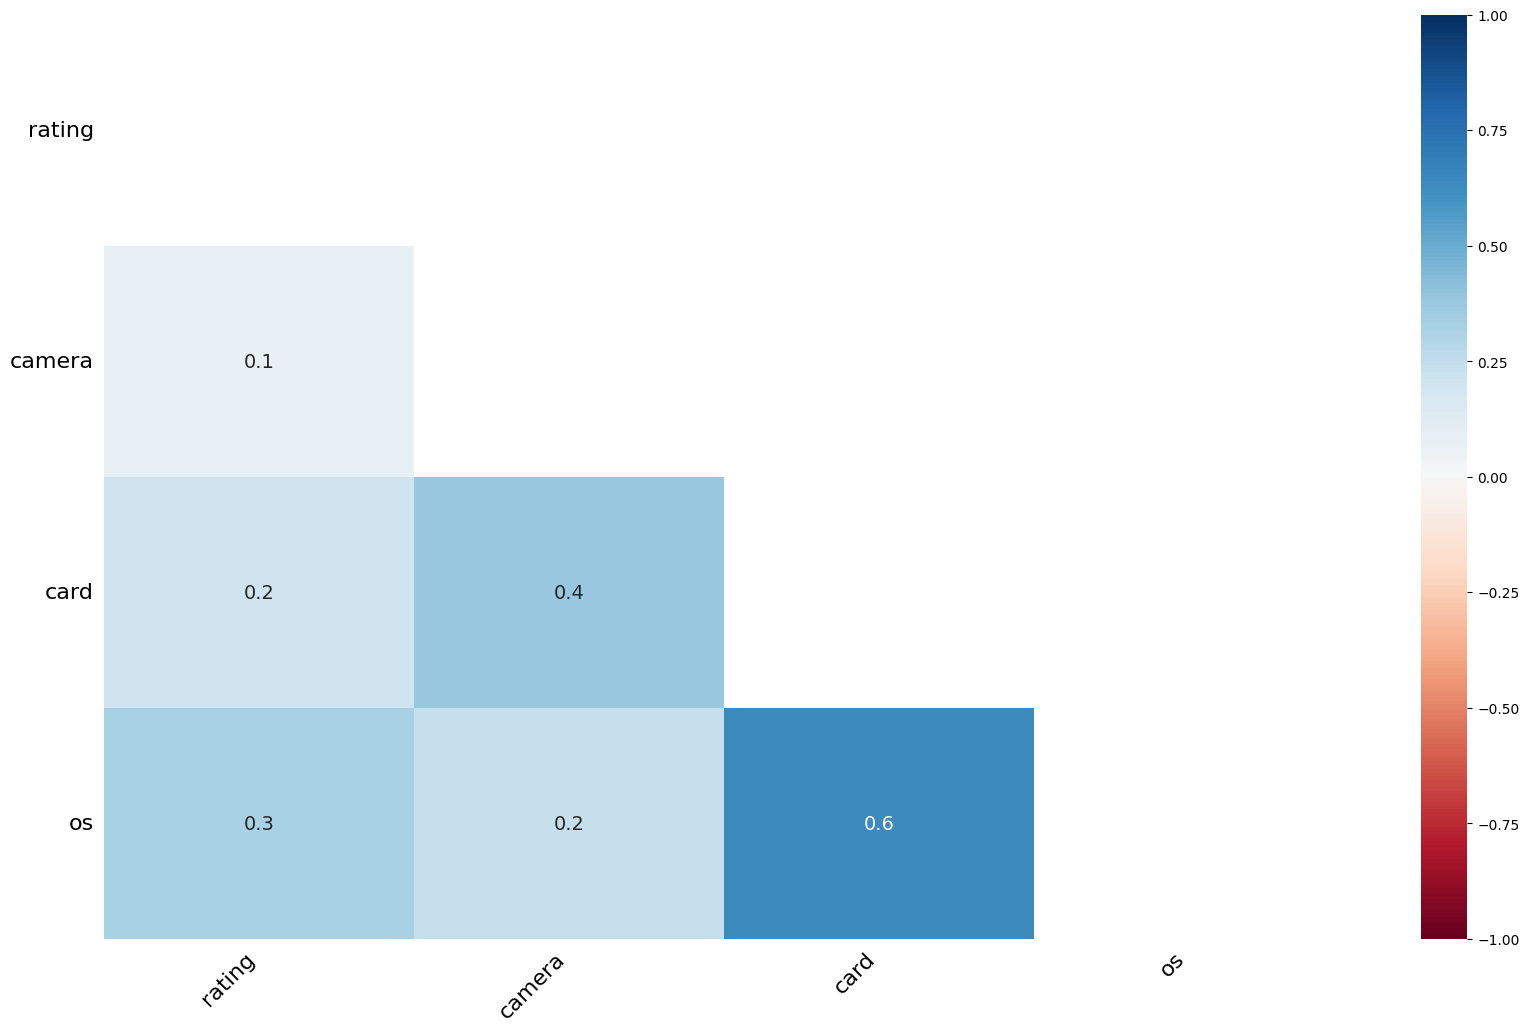

In [113]:
msno.heatmap(df)
plt.show()

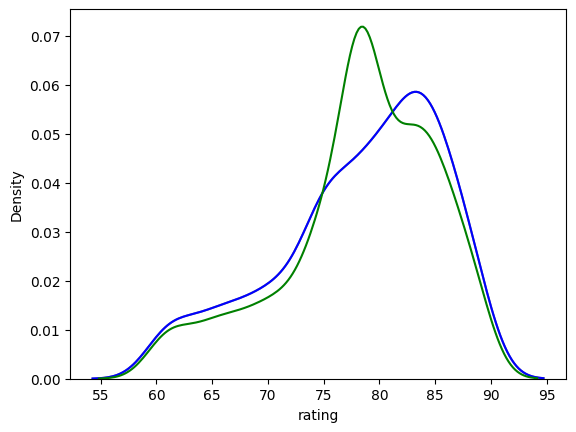

In [114]:
X = df['rating']
sns.kdeplot(X, color='black', alpha=0.5)

_X = df['rating'].dropna()
sns.kdeplot(_X, color='b')

X_median = df['rating'].fillna(df['rating'].mean())
sns.kdeplot(X_median, color='g')

plt.show()

In [115]:
data1 = data.copy()

In [116]:
dummies_cols = ['brand_name', 'processor_brand','os','sim_type']

data1 = pd.get_dummies(data,columns=dummies_cols,dummy_na=['rating'], drop_first=True)
data1.replace({True:1, False:0}, inplace=True)

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import StandardScaler, RobustScaler,OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score

In [118]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Copy data
data1 = data.copy()

# List of columns to be converted to dummy variables
dummies_cols = ['brand_name', 'processor_brand', 'os', 'sim_type']

# Creating dummy variables for categorical columns
data1 = pd.get_dummies(data,columns=dummies_cols,dummy_na=['rating'], drop_first=True)

# Columns to be scaled
cols_to_scale = [4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]

# Column transformer with RobustScaler and MissingIndicator for the 'rating' column
transformer = ColumnTransformer(
    transformers=[
        ("scaler", RobustScaler(with_centering= True, with_scaling= True), cols_to_scale),
        ('indicator', MissingIndicator(), [0])

    ],
    remainder='passthrough'
)

# Setting up the pipeline
pipe = Pipeline([
    ('transformer', transformer),
    ('model', LinearRegression(n_jobs=-1))
])

# Evaluation function
def evaluate_model_multiple_states(X, y, n_splits=10, n_runs=10, pipe=None):
    all_metrics = []

    for run in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=run)
        metrics = []

        for split_index, (train_index, test_index) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)

            n = len(X_test)
            SSE = np.sum((y_test - y_pred) ** 2)
            SE = np.sqrt(SSE / (n - 2)) if n > 2 else np.inf
            MAE = np.mean(np.abs(y_test - y_pred))
            MSE = np.mean((y_test - y_pred) ** 2)
            RMSE = np.sqrt(MSE)
            R2 = r2_score(y_test, y_pred)
            R2adj = 1 - ((1 - R2) * (n - 1) / (n - 2)) if n > 2 else -np.inf

            metrics.append({
                'run': run,
                'split_index': split_index,
                'train_index': train_index.tolist(),
                'test_index': test_index.tolist(),
                'SSE': SSE,
                'SE': SE,
                'MAE': MAE,
                'MSE': MSE,
                'RMSE': RMSE,
                'R2': R2,
                'R2adj': R2adj,
                'Difference': R2 - R2adj
            })

        all_metrics.extend(metrics)

    all_metrics_df = pd.DataFrame(all_metrics)
    return all_metrics_df

In [119]:
# Prepare the feature matrix X and target vector y
X = data1.drop('price', axis=1)
y = data1['price'].values

# Evaluate the model
metrics_df_multiple = evaluate_model_multiple_states(X, y, n_splits=20, n_runs=1000, pipe=pipe)
best_splits_multiple = metrics_df_multiple.sort_values(by='Difference', ascending=True)

# Display the top 3 splits with the smallest difference between R2 and R2adj
best_splits_multiple.head(3)

,run,split_index,train_index,test_index,SSE,SE,MAE,MSE,RMSE,R2,R2adj,Difference
12061,603,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[0, 12, 19, 31, 35, 46, 110, 157, 169, 179, 23...",2.730267e+09,7621.731705,5575.615603,5.571974e+07,7464.565718,0.966623,0.965913,0.000710
123,6,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[37, 88, 91, 152, 153, 181, 199, 205, 248, 263...",2.407136e+09,7156.511891,4880.428571,4.912523e+07,7008.939096,0.957949,0.957054,0.000895
10862,543,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[40, 51, 67, 82, 101, 105, 122, 193, 198, 203,...",3.970039e+09,9190.696763,6937.301020,8.102120e+07,9001.177506,0.953179,0.952183,0.000996


In [127]:
transformer = ColumnTransformer(
    transformers=[
        ("scaler", RobustScaler(with_centering= True, with_scaling= True), cols_to_scale),
        ('indicator', MissingIndicator(), [0])

    ],
    remainder='passthrough'
)

transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 [4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]),
                                ('indicator', MissingIndicator(), [0])])

In [130]:
data['rating'] = transformer.fit_transform(X)['indicator__missingindicator_rating']

### Further Steps:
1. **Check Model Assumptions and Validity**:
   - Ensure that the assumptions of linear regression (e.g., linearity, independence, homoscedasticity, normality of residuals) are met.
   - Examine residual plots and perform statistical tests if necessary.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

class LinearRegressionAssumptions:
    def __init__(self, X, y, transformer, random_state=42):
        self.X = X
        self.y = y
        self.random_state = random_state
        self.transformer = transformer
        self.model = LinearRegression(n_jobs=-1)
        self.fitted = False

    def fit_model(self):
        X_transformed = self.transformer.fit_transform(self.X)
        X_train, X_test, y_train, y_test = train_test_split(
            X_transformed, self.y, test_size=0.2, random_state=self.random_state
        )
        self.model.fit(X_train, y_train)
        self.y_pred = self.model.predict(X_test)
        self.residuals = y_test - self.y_pred
        self.fitted = True
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def check_linearity(self):
        if not self.fitted:
            raise ValueError("Model is not fitted yet.")
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_pred, self.residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.title('Linearity Check')
        plt.show()

    def check_normality(self):
        if not self.fitted:
            raise ValueError("Model is not fitted yet.")
        plt.figure(figsize=(10, 6))
        sns.histplot(self.residuals, kde=True)
        plt.title('Normality of Residuals')
        plt.show()

        plt.figure(figsize=(10, 6))
        stats.probplot(self.residuals, dist="norm", plot=plt)
        plt.title('Q-Q Plot')
        plt.show()

    def check_homoscedasticity(self):
        if not self.fitted:
            raise ValueError("Model is not fitted yet.")
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_pred, self.residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.title('Homoscedasticity Check')
        plt.show()

        # Adding a constant column to X_test for the Breusch-Pagan test
        X_test_with_const = sm.add_constant(self.X_test)
        test_result = het_breuschpagan(self.residuals, X_test_with_const)
        labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
        test_result_dict = dict(zip(labels, test_result))
        print("Breusch-Pagan Test Results:")
        for key, value in test_result_dict.items():
            print(f"{key}: {value}")

    def check_independence(self):
        if not self.fitted:
            raise ValueError("Model is not fitted yet.")
        dw_statistic = durbin_watson(self.residuals)
        print(f'Durbin-Watson Statistic: {dw_statistic}')
        if dw_statistic < 1.5:
            print("There is evidence of positive autocorrelation.")
        elif dw_statistic > 2.5:
            print("There is evidence of negative autocorrelation.")
        else:
            print("There is no evidence of autocorrelation.")

    def check_all_assumptions(self):
        if not self.fitted:
            raise ValueError("Model is not fitted yet.")
        try:
            self.check_linearity()
            self.check_normality()
            self.check_homoscedasticity()
            self.check_independence()
        except Exception as e:
            print(f"Error checking assumptions: {e}")

In [121]:
# Example usage:
# Assume data1, best_splits_multiple are already defined and preprocessed

# Define transformer
dummies_cols = ['brand_name', 'processor_brand', 'os', 'sim_type']
data1 = pd.get_dummies(data, columns=dummies_cols, dummy_na=['rating'], drop_first=True)
cols_to_scale = [4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]
transformer = ColumnTransformer(
    transformers=[
        ("scaler", RobustScaler(with_centering=True, with_scaling=True), cols_to_scale),
        ('indicator', MissingIndicator(), [0])
    ],
    remainder='passthrough'
)

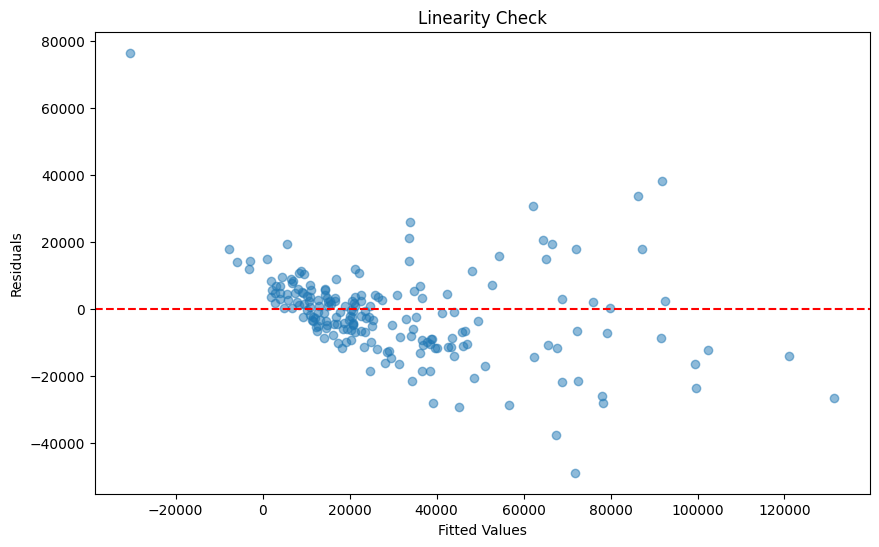

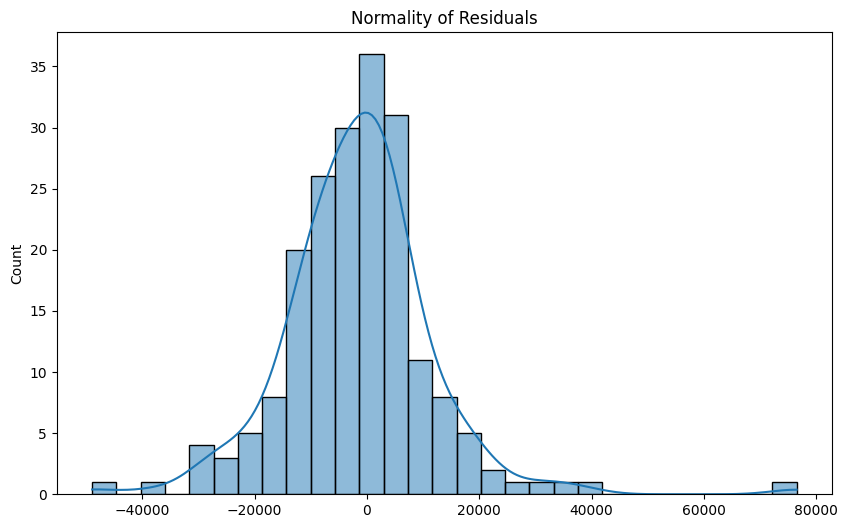

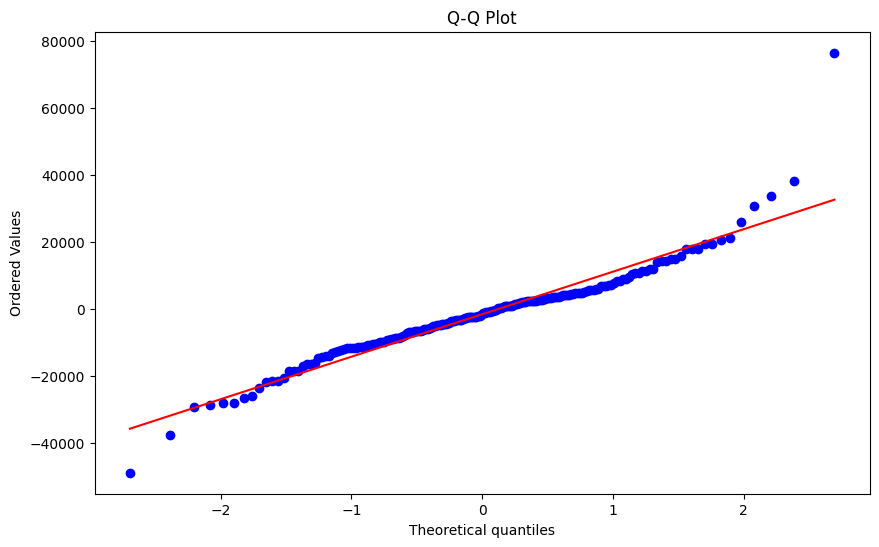

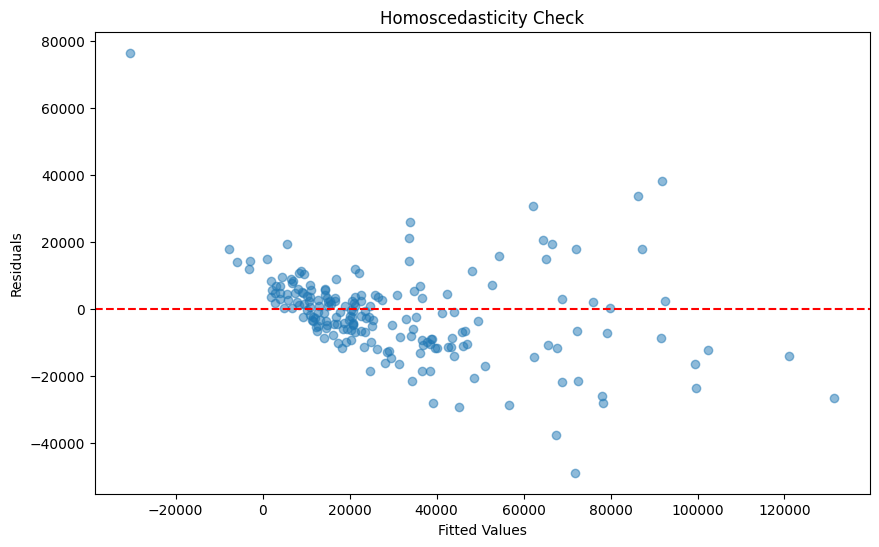

Breusch-Pagan Test Results:
LM Statistic: 179.08784888660114
LM-Test p-value: 7.577486021944554e-09
F-Statistic: 29.899201185612398
F-Test p-value: 1.4268731094631445e-55
Durbin-Watson Statistic: 2.0123809876273238
There is no evidence of autocorrelation.


In [122]:
# Select best split
row = 123
train_index = best_splits_multiple.iloc[row]['train_index']
test_index = best_splits_multiple.iloc[row]['test_index']
random_state = best_splits_multiple.iloc[row]['run']

# Ensure we correctly select rows using iloc
data2 = data1.iloc[train_index + test_index]
X = data2.drop('price', axis=1)
y = data2['price'].values

# Instantiate the class
lr_assumptions = LinearRegressionAssumptions(X, y, transformer, random_state)

# Fit the model
lr_assumptions.fit_model()

# Check all assumptions
lr_assumptions.check_all_assumptions()


Interpreting the results of the regression diagnostics is crucial to understand the validity of the linear regression model assumptions. Here’s how to interpret each component:

### Linearity Check
**Graph: Scatter Plot of Fitted Values vs. Residuals**
- **Interpretation**: The scatter plot should show no clear pattern. If the residuals (differences between observed and predicted values) are randomly dispersed around the horizontal axis (y=0), it suggests that the linearity assumption is met. If there is a clear pattern (e.g., a U-shape or any systematic structure), it indicates that the relationship between the independent variables and the dependent variable might not be linear.

### Normality of Residuals
**Graph: Histogram and Q-Q Plot of Residuals**
- **Histogram**: This graph shows the distribution of residuals.
  - **Interpretation**: The residuals should ideally form a bell-shaped curve (normal distribution). If the histogram is approximately symmetric and bell-shaped, it suggests that the residuals are normally distributed.
- **Q-Q Plot**: This graph plots the quantiles of the residuals against the quantiles of a normal distribution.
  - **Interpretation**: If the residuals are normally distributed, the points should lie approximately on a straight line. Deviations from the line suggest departures from normality.

### Homoscedasticity Check
**Graph: Scatter Plot of Fitted Values vs. Residuals (same as linearity check)**
- **Interpretation**: The scatter plot should show no clear pattern or funnel shape (i.e., the spread of residuals should be consistent across all fitted values). If the residuals fan out or funnel in, it indicates heteroscedasticity (i.e., the variance of the residuals is not constant).

### Breusch-Pagan Test Results
- **LM Statistic and F-Statistic**: These are test statistics used to detect heteroscedasticity.
- **p-values (LM-Test p-value and F-Test p-value)**: 
  - **Interpretation**: If the p-values are below a significance level (commonly 0.05), it indicates the presence of heteroscedasticity. In your case, both p-values are very small (close to zero), suggesting strong evidence against the null hypothesis of homoscedasticity. This means that heteroscedasticity is present, and the assumption of constant variance is violated.

### Durbin-Watson Statistic
- **Value**: 2.012
  - **Interpretation**: The Durbin-Watson statistic tests for autocorrelation in the residuals.
    - Values close to 2 indicate no autocorrelation.
    - Values approaching 0 suggest positive autocorrelation.
    - Values approaching 4 suggest negative autocorrelation.
  - In your case, a value of 2.012 indicates that there is no evidence of autocorrelation in the residuals.

### Summary Interpretation
- **Linearity**: Check the scatter plot of fitted values vs. residuals. If no clear pattern is observed, the linearity assumption is met.
- **Normality**: Check the histogram and Q-Q plot. If the residuals follow a bell-shaped distribution and lie on a straight line in the Q-Q plot, the normality assumption is met.
- **Homoscedasticity**: Despite the scatter plot check, the Breusch-Pagan test indicates heteroscedasticity (violated assumption of constant variance).
- **Independence**: The Durbin-Watson statistic shows no evidence of autocorrelation, indicating the independence assumption is met.

Since heteroscedasticity is detected, consider using robust standard errors or applying a different model that can handle heteroscedasticity (e.g., generalized least squares or weighted least squares). Addressing this issue is important for making valid inferences from the model.

2. **Model Improvement**:
   - If the performance is not satisfactory, consider using more complex models such as decision trees, random forests, gradient boosting, or neural networks.
   - Perform feature engineering to create new features or transform existing ones.
   - Tune hyperparameters using techniques like grid search or randomized search.

3. **Interpret Results**:
   - Analyze the top-performing splits and runs to understand the model’s behavior and consistency across different data partitions.
   - Investigate any significant discrepancies between training and testing performance.

4. **Refinement and Deployment**:
   - Once the model performance is optimized and validated, consider deploying the model for real-world predictions.
   - Monitor the model’s performance over time to ensure it remains accurate and reliable.

In [133]:
import pickle
with open('smartphone_cleaned.pkl', 'wb') as f:
    pickle.dump(data, f)